In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from math import cos

In [2]:
CHUNK = 4096
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
SECONDS = 4

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, output=True, frames_per_buffer=CHUNK)

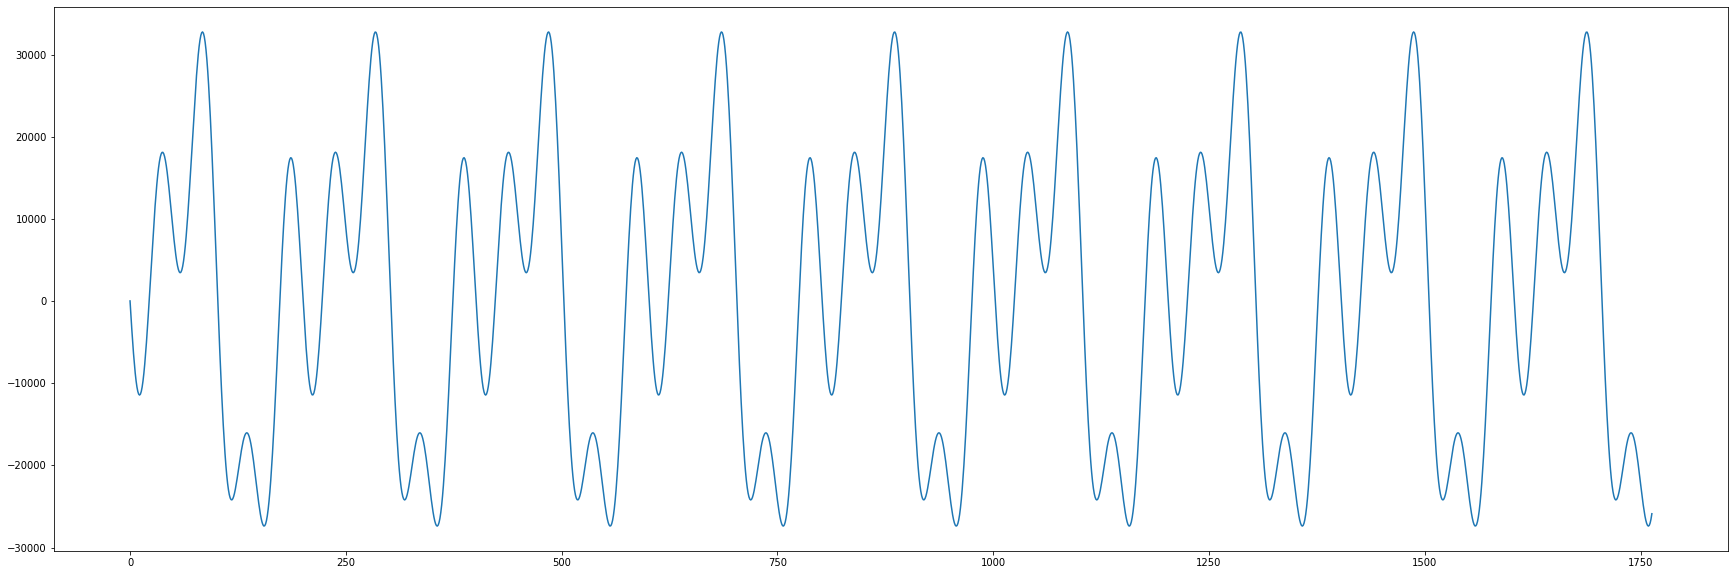

In [3]:
time_in = np.arange((RATE * SECONDS), dtype=np.int64)

freq = 220.0 #(1/440.0)seconds/cycle * 44100 samples/second = x samples per cycle

temp_0 = np.sin(time_in * (freq * 2 * np.pi)/RATE)
for i in range(2,5):
    phase = np.random.randint(RATE)
    temp_0 += np.sin((time_in + phase) * (freq * i * 2 * np.pi)/RATE) * np.random.random()
    
temp_0 = (temp_0 * (1 << 15) / np.max(np.abs(temp_0))).astype(np.int16)
plt.figure(figsize=(30,10))
plt.plot(temp_0[:(441* 4)])
plt.show()


stream.write(temp_0)

In [4]:
# 4 bits for amplitude, 4 bits for phase, (8 bits) * 8 overtones = 64 bits
# 16 dimensional space

In [5]:
stream.write(temp_0)

In [6]:
-0.7 % 0.5

0.30000000000000004

In [148]:
def cos_approx(x):
    xt = (x % 1.570796326795)
    t =  1 - ((xt**2)/2.0) + ((xt**4)/24.0) - ((x**6)/720.0)
    
    ct = (x % 6.283185607180)
    if  ct <= 1.570796326795:
        return t
    elif ct < 2 * 1.570796326795:
        return -t
    elif ct < 3 * 1.570796326795:
        return t
    else:
        return -t

In [139]:
diffs = []
for i in range(1571):
    diffs.append((cos(i/1000.0) - cos_approx(i/1000.0)) * (2**10))
sorted(diffs, reverse=True)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.1368683772161603e-13,
 -1.1368683772161603e-13,
 -1.1368683772161603e-13,
 -3.410605131648481e-13,
 -7.958078640513122e-13,
 -1.4779288903810084e-12,
 -2.5011104298755527e-12,
 -4.320099833421409e-12,
 -6.821210263296962e-12,
 -1.0686562745831907e-11,
 -1.6257217794191092e-11,
 -2.3874235921539366e-11,
 -3.433342499192804e-11,
 -4.843059286940843e-11,
 -6.684786058031023e-11,
 -9.106315701501444e-11,
 -1.21985976875294e-10,
 -1.6132162272697315e-10,
 -2.105480234604329e-10,
 -2.7182522899238393e-10,
 -3.4708591556409374e-10,
 -4.3939962779404595e-10,
 -5.510401024366729e-10,
 -6.85417944623623e-10,
 -8.458300726488233e-10,
 -1.0368239600211382e-09,
 -1.2622649592231028e-09,
 -1.5270416042767465e-09,
 -1.8367245502304286e-09,
 -2.1969981389702298e-09,
 -2.6143425202462822e-09,
 -3.095806277997326e-09,
 -3.6490064303507097e-09,
 -4.282128429622389e-09,
 -5.004153535992373e-09,
 -5.825313564855605e-09,
 -6.755499271093868e-09,
 -7.806306712154765e-09,
 -8

In [149]:
ca = np.asarray([cos_approx(i/1000.0) for i in range(1571 * 2)])
c = np.asarray([cos(i/1000.0) for i in range(1571 * 2)])

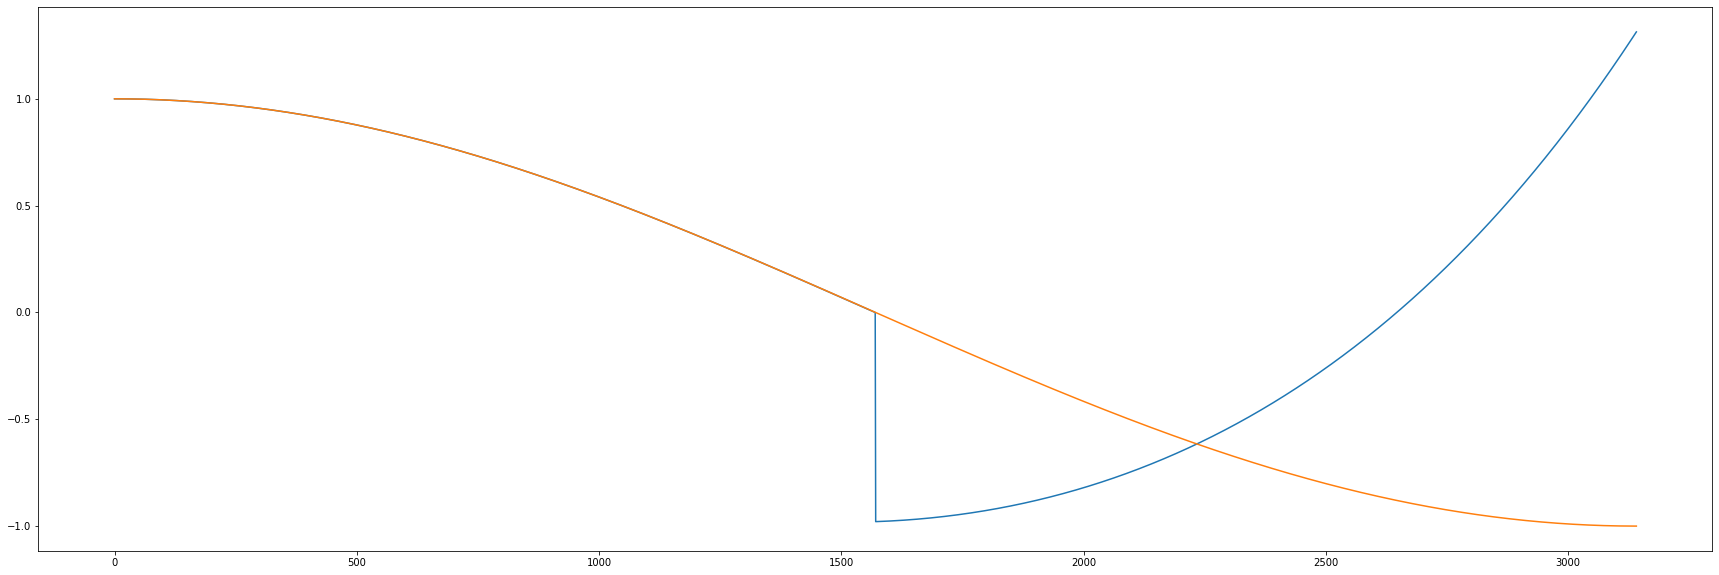

In [150]:
plt.figure(figsize=(30,10))
plt.plot(ca)
plt.plot(c)

In [113]:
0.5**4

0.0625

In [114]:
(((128>>4) * (128>>4))>>4) * (((128>>4) * (128>>4))>>4)

16

In [129]:
def arduino_cos(x, rate):
    #max = 1<<15 and min = -1<<15
    m = 14
    
    x2 = (x>>7 * x>>7)
    x4 = (x2>>7 * x2>>7)
    x6 = (x4>>7 * x2>>7)
        
    r = (1) - x**2/(2 * rate**2) + x**4/(24 * rate**4) - x**6/(720 * rate**6)
    
    return r


In [130]:
ac = [arduino_cos(i, 1000) for i in range(1571)]

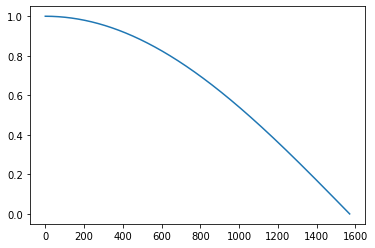

In [131]:
plt.plot(ac)

In [171]:
cos_table = (np.cos(np.arange(1<<14) * (2 * np.pi / (1 << 14))) * ((1<<7) - 1)).astype(np.int8)

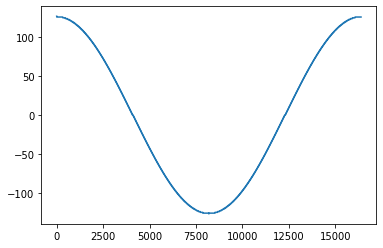

In [172]:
plt.plot(cos_table)

In [161]:
len(cos_table)

16384

In [242]:
period = 256
print((period >> 2), (period>>1), ((period>>1) + (period>>2)), (period))

64 128 192 256


In [224]:
~((-12 >> 15) & 1)

-2

In [7]:
def easy_smooth_wave(x, granularity): 
    #granularity is a power of 2, how fine or coarse we wanna make the wave
    p = x%granularity #get relative position in cycle (can take care of this when you increment x)

    """
    # 19 operations
    q = (period >> 2)
    p0 = p - q #subtract the first quarter period
    p1 = p0 - q #subtract the second quarter period
    p2 = p1 - q #subtract the third quarter period
    # check which range:
    int0 = ((p0) >> 15) & 1
    int1 = ~((p0) >> 15) & ((p1) >> 15) & 1 
    int2 = ~((p1) >> 15) & ((p2) >> 15) & 1  
    int3 = ~((p2) >> 15) & 1
    """
    
    # 18 operations
    q4 = (granularity >> 2)
    q2 = (granularity >> 1)
    p0 = (p - q4) >> 15
    p1 = (p - q2) >> 15 
    p2 = (p - q2 - q4) >> 15
    # check which range:
    t0 = p0 & 1
    t1 = ~p0 & p1 & 1 
    t2 = ~p1 & p2 & 1  
    t3 = ~p2 & 1
    
    #1<<15
    
    """
    1 - (p/period)**2          #int0
    (1-(p/period))**2 - 1      #int1
    (p/period)**2 - 1          #int2
    1 - (1 - (p/period))**2    #int3
    """
    
    """
    let P = (p/period)
    
    0:  1-P^2
    1:  (1-P)^2 - 1 = 1 - 2P + P^2 - 1 = P^2 - 2P
    2:  P^2 - 1
    3:  1 - (1-P)^2 = 1 - (1 - 2P + P^2) = 2P - P^2
    
    aP^2 + bP + C
        a  b  c
    0: -1  0  1
    1:  1 -2  0
    2:  1  0 -1
    3: -1  2  0
    
    a = (-1 * (t0 | t3)) + (t1 | t2)
    b = (-2 * t1) + (2 * t3)
    c = (t0) - (t1 | t2)
    """
    
#     P = (p - ((t1 + t2*2 + t3*3) * (period >> 2))) / (period>>2)
    # (p - xT)
    sub = (t1 + (t2<<1) + t3 + (t3<<1))
    ran = 1 << 7
    P = (p<<2)/period - sub
    
    
    a = (t1 | t2) - (t0 | t3)
    b = (t3 - t1)<<1
    c = (t0 - t2)
    
    P = p % (granularity >> 2)
    
    
    """
    P * P = 
    """
    
    
    print(np.round(P, 3), "\t", t0, t1, t2, t3)
#     return int(((a*P*P) + (b*P) + c) * ran)
    
    return int( (a * ran * P + b * ran) * P) + (c * ran)
    
#         access time
    
#     if int0 == 1:
#         return 0
#     if int1 == 1:
#         return 1
#     if int2 == 1:
#         return 2
#     if int3 == 1:
#         return 3
    
#     return -1

In [8]:
n = np.asarray([easy_smooth_wave(x, 64) for x in range(100)])
plt.plot(n)
plt.show()

NameError: name 'period' is not defined

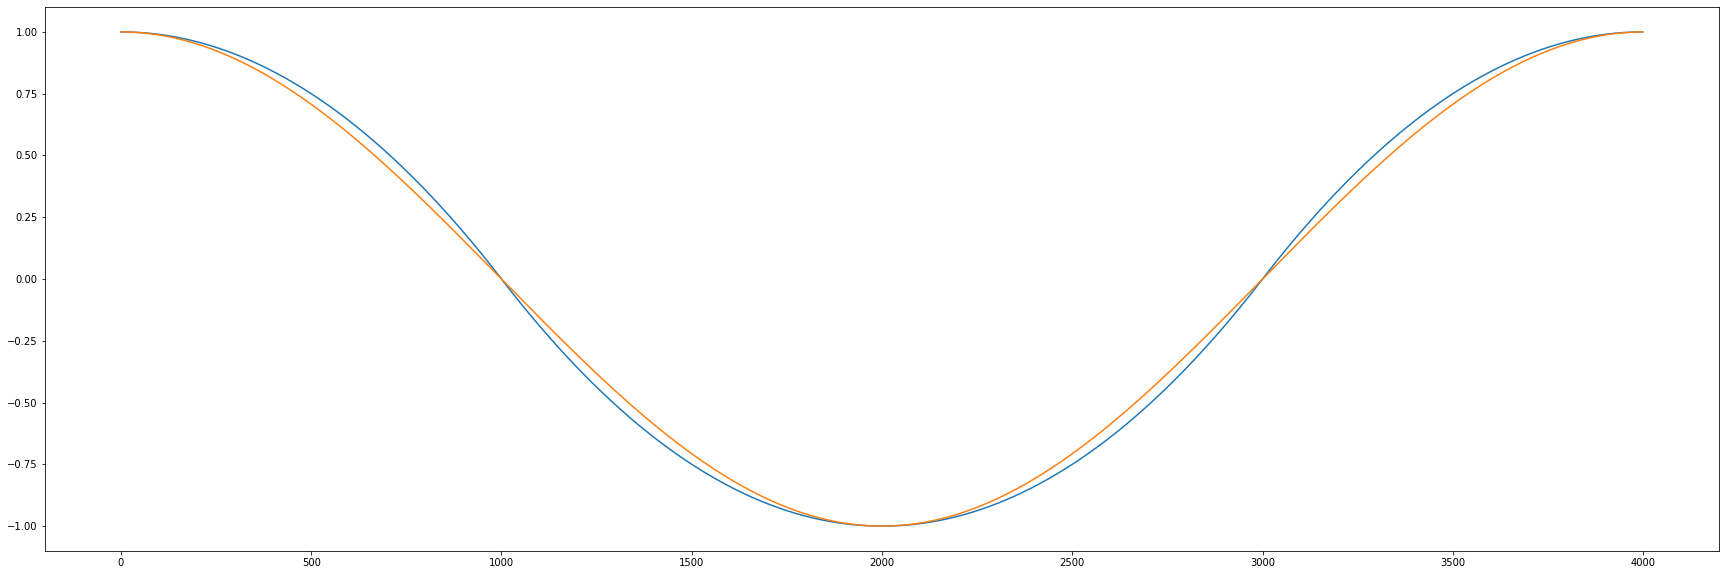

In [277]:
c = np.concatenate((np.asarray([1 - (x/1000)**2 for x in range(1000)]), 
                    np.asarray([(1-(x/1000))**2 - 1 for x in range(1000)]),
                    np.asarray([(x/1000)**2 - 1 for x in range(1000)]),
                    np.asarray([1 - (1 - (x/1000))**2 for x in range(1000)])
                ))
plt.figure(figsize=(30,10))
plt.plot(c)
plt.plot(np.cos(np.arange(len(c)) * (2 * np.pi/len(c))))
plt.show()